## Part A - Q1 A - Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
from zipfile import ZipFile
file_name = "plant-seedlings-classification.zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall()

## Part A - Q1 B - Map the images from train folder with train labels to form a DataFrame.

In [3]:
!pip install opencv-python

In [4]:
import cv2
cols = ['Name','Class','Image']
file_list = []
class_list = []
image_list = []

for directory in os.listdir('plant-seedlings-classification/train'):
    if not directory.startswith('.'):
        print(directory);
        for filename in os.listdir('plant-seedlings-classification/train/'+ directory):
            img_data = cv2.imread('plant-seedlings-classification/train/'+directory+"/"+filename)
            file_list.append(filename)
            image_list.append(img_data)
            class_list.append(directory)

seedlings_df = pd.DataFrame({"file_name": file_list, "Class": class_list, "Image_data": image_list})

Cleavers
Sugar beet
Common Chickweed
Loose Silky-bent
Scentless Mayweed
Shepherds Purse
Fat Hen
Common wheat
Black-grass
Small-flowered Cranesbill
Charlock
Maize


In [5]:
seedlings_df.head(5)

file_name     Class                                         Image_data
0  6a4ef17c2.png  Cleavers  [[[45, 61, 72], [50, 66, 73], [28, 47, 49], [2...
1  0515bc601.png  Cleavers  [[[146, 156, 161], [146, 156, 162], [147, 156,...
2  0ac327873.png  Cleavers  [[[67, 78, 91], [63, 73, 88], [63, 74, 88], [6...
3  94f82e916.png  Cleavers  [[[45, 62, 80], [42, 57, 78], [46, 60, 81], [4...
4  2c5c4d127.png  Cleavers  [[[62, 98, 137], [59, 96, 135], [62, 97, 136],...

## Part A - Q1 C - Write a function that will select n random images and display images along with its species.

Enter number of images to display: 5


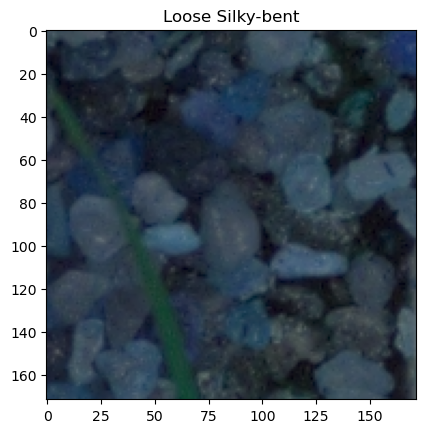

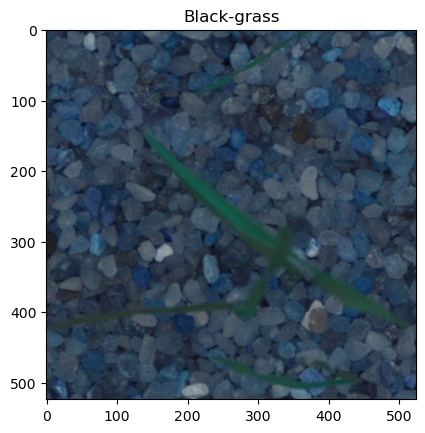

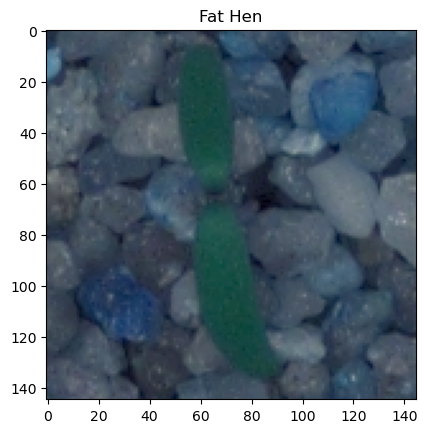

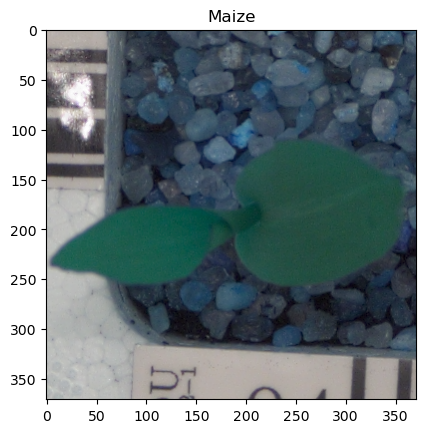

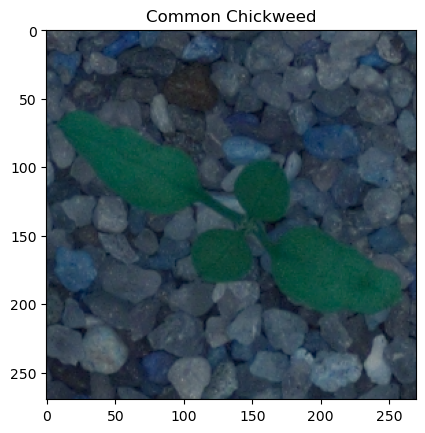

In [6]:
def display_random_images(N,df):
    for i in np.random.randint(1,df.shape[0],N):
        plt.imshow(df.at[i,'Image_data'])
        plt.title("{}".format(df.at[i,'Class']))
        plt.show()

#Genrate Random numbers and then based on the number show images    
N = int(input("Enter number of images to display: "))
display_random_images(N,seedlings_df)
   

## Part A - Q2 A - Create X & Y from the DataFrame.

In [7]:
X = seedlings_df['Image_data']
y = seedlings_df['Class']

## Part A - Q2 B - Encode labels of the images.

In [8]:
y = pd.get_dummies(y)
y.shape

(4750, 12)

## Part A - Q2 C - Unify shape of all the images.
## Part A - Q2 D - Normalise all the images.

In [9]:
normalised_X=[]
for image in X: 
    image = np.array(image, dtype = "float32")
    image = cv2.resize(image, (128, 128))
    image = np.reshape(image, (128, 128, 3)) 
    ## Part A - Q2 D - Normalise all the images.
    image /= 255.0
    normalised_X.append(np.array(image, dtype = "float32")) 

In [10]:
normalised_X=np.array(normalised_X, dtype = "float32")

In [11]:
normalised_X.shape

(4750, 128, 128, 3)

## Part A - Q3 A - Split the data into train and test data.

In [12]:
from sklearn.model_selection import train_test_split
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(normalised_X, y, test_size=.20, random_state=2, stratify=y)

X_nn_train = np.asarray(X_nn_train)
X_nn_test = np.asarray(X_nn_test)
y_nn_train = np.asarray(y_nn_train)
y_nn_test = np.asarray(y_nn_test)

## Part A - Q3 B - Create new CNN architecture to train the model.

In [13]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

model=Sequential()
model.add(BatchNormalization(input_shape=(128,128,3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())

model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))

# Classify in one of the 12 categories
model.add(Dense(units=12,activation='softmax'))


2023-01-15 21:50:56.032002: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-15 21:51:04.240603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
model.build()

## Part A - Q3 C - Train the model on train data and validate on test data.

In [16]:
EPOCH=10
model_cal=model.fit(x=X_nn_train, y=y_nn_train, batch_size=10, epochs= EPOCH, validation_split=0.2)

Epoch 1/10
304/304 [==============================] - 50s 160ms/step - loss: 2.0145 - accuracy: 0.3141 - val_loss: 1.7586 - val_accuracy: 0.4224
Epoch 2/10
304/304 [==============================] - 46s 151ms/step - loss: 1.1766 - accuracy: 0.6053 - val_loss: 1.0450 - val_accuracy: 0.6316
Epoch 3/10
304/304 [==============================] - 44s 145ms/step - loss: 0.7055 - accuracy: 0.7638 - val_loss: 0.7414 - val_accuracy: 0.7526
Epoch 4/10
304/304 [==============================] - 43s 142ms/step - loss: 0.5029 - accuracy: 0.8260 - val_loss: 0.7776 - val_accuracy: 0.7592
Epoch 5/10
304/304 [==============================] - 44s 144ms/step - loss: 0.3146 - accuracy: 0.8901 - val_loss: 0.8994 - val_accuracy: 0.7487
Epoch 6/10
304/304 [==============================] - 44s 144ms/step - loss: 0.2294 - accuracy: 0.9164 - val_loss: 0.9836 - val_accuracy: 0.7697
Epoch 7/10
304/304 [==============================] - 46s 152ms/step - loss: 0.1773 - accuracy: 0.9372 - val_loss: 1.0651 - val_ac

In [17]:
#PartA.3.C Test Data validation 
print(model.evaluate(X_nn_test, y_nn_test))

30/30 [==============================] - 3s 105ms/step - loss: 1.1577 - accuracy: 0.7537
[1.1576565504074097, 0.7536842226982117]


## ~75.4 % Accuracy on test data.

## Part A - Q3 D - Select a random image and print actual label and predicted label for the same.

In [18]:
pred = model.predict(X_nn_test[13:14])
pred[0]

1/1 [==============================] - 0s 141ms/step


array([3.08339708e-11, 1.35360506e-06, 1.81241830e-07, 9.12610520e-09,
       1.89561760e-07, 1.46340966e-07, 1.05563665e-11, 9.99919891e-01,
       7.44359641e-05, 1.84628888e-07, 2.51341198e-10, 3.62260403e-06],
      dtype=float32)

In [19]:
pred[0].argmax()

7

In [20]:
y_nn_test[13:14].argmax()

7

In [21]:
y_nn_test[13:14]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

### Note : Result matched the prediction

# Part B: DOMAIN: Botanical Research

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob
import itertools

import cv2
from skimage import io

import numpy as np
import pandas as pd

## Part B - Q1 A - Import and read oxflower17 dataset from tflearn and split into X and Y while loading.

In [23]:
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term


In [24]:
X, y  = oxflower17.load_data()

## Part B - Q1 B - Print Number of images and shape of the images.

In [25]:
print(X.shape)

(1360, 224, 224, 3)


In [26]:
# There are 1360 images of size 224 * 224 pixels and 3 channels (RGB)

## Part B - Q1 C - Print count of each class from y

In [27]:
y

array([ 0,  2, 10, ...,  5, 14, 11])

In [28]:
series_y=pd.Series(y)
series_y.nunique()

17

In [29]:
series_y.value_counts()

0     80
6     80
9     80
1     80
4     80
15    80
11    80
7     80
3     80
2     80
5     80
8     80
13    80
12    80
16    80
10    80
14    80
dtype: int64

In [41]:
# There are 17 unique classes and each class has 80 images

## Part B - Q2 A - Display 5 random images.

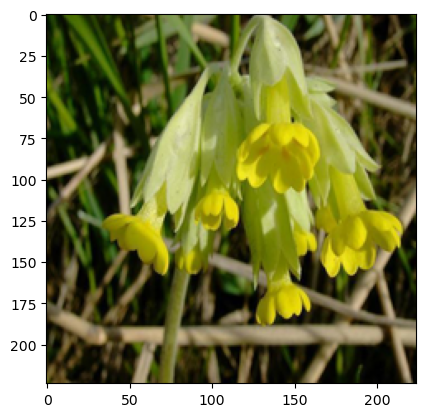

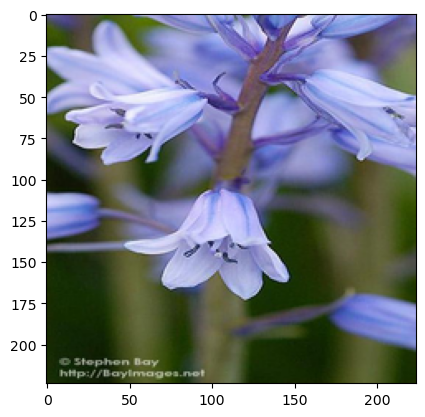

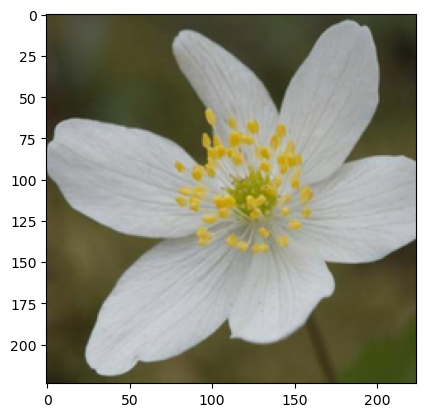

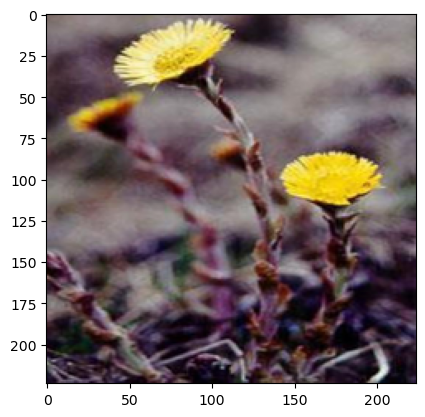

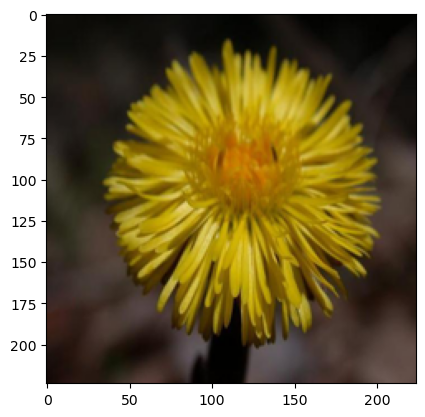

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in np.random.randint(1,X.shape[0],5):
    plt.imshow(X[i])
    plt.show()
    

## Part B - Q2 B - Select any image from the dataset and assign it to a variable.

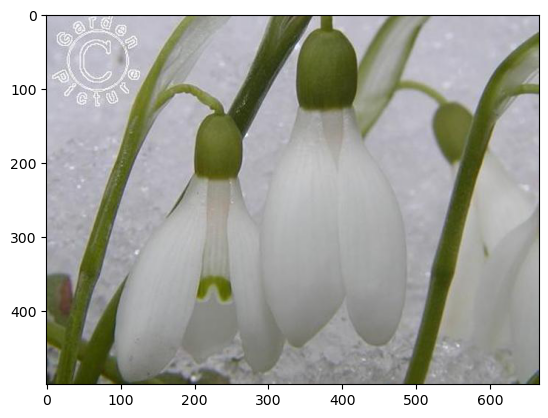

In [43]:
## PartB.2.B Select any image from the dataset and assign it to a variable. [1 Marks]
import cv2

from PIL import Image, ImageOps, ImageFilter

path='./17flowers/jpg/1/image_0085.jpg'
image_original = Image.open(path)
plt.imshow(image_original)
plt.show()

## Part B - Q2 C - Transform the image into grayscale format and display the same.

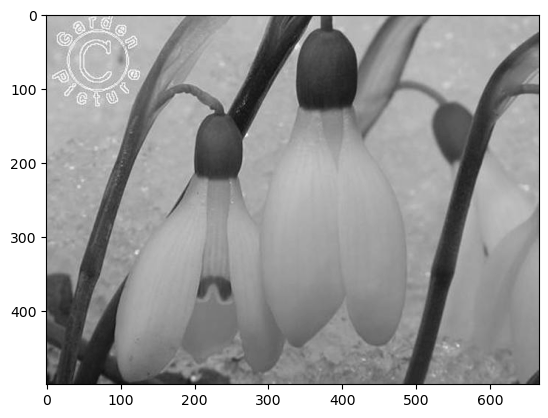

In [44]:
gray_image = cv2.cvtColor(np.asarray(image_original), cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image,cmap='gray')
plt.show()

## Part B - Q2 D - Apply a filter to sharpen the image and display the image before and after sharpening.

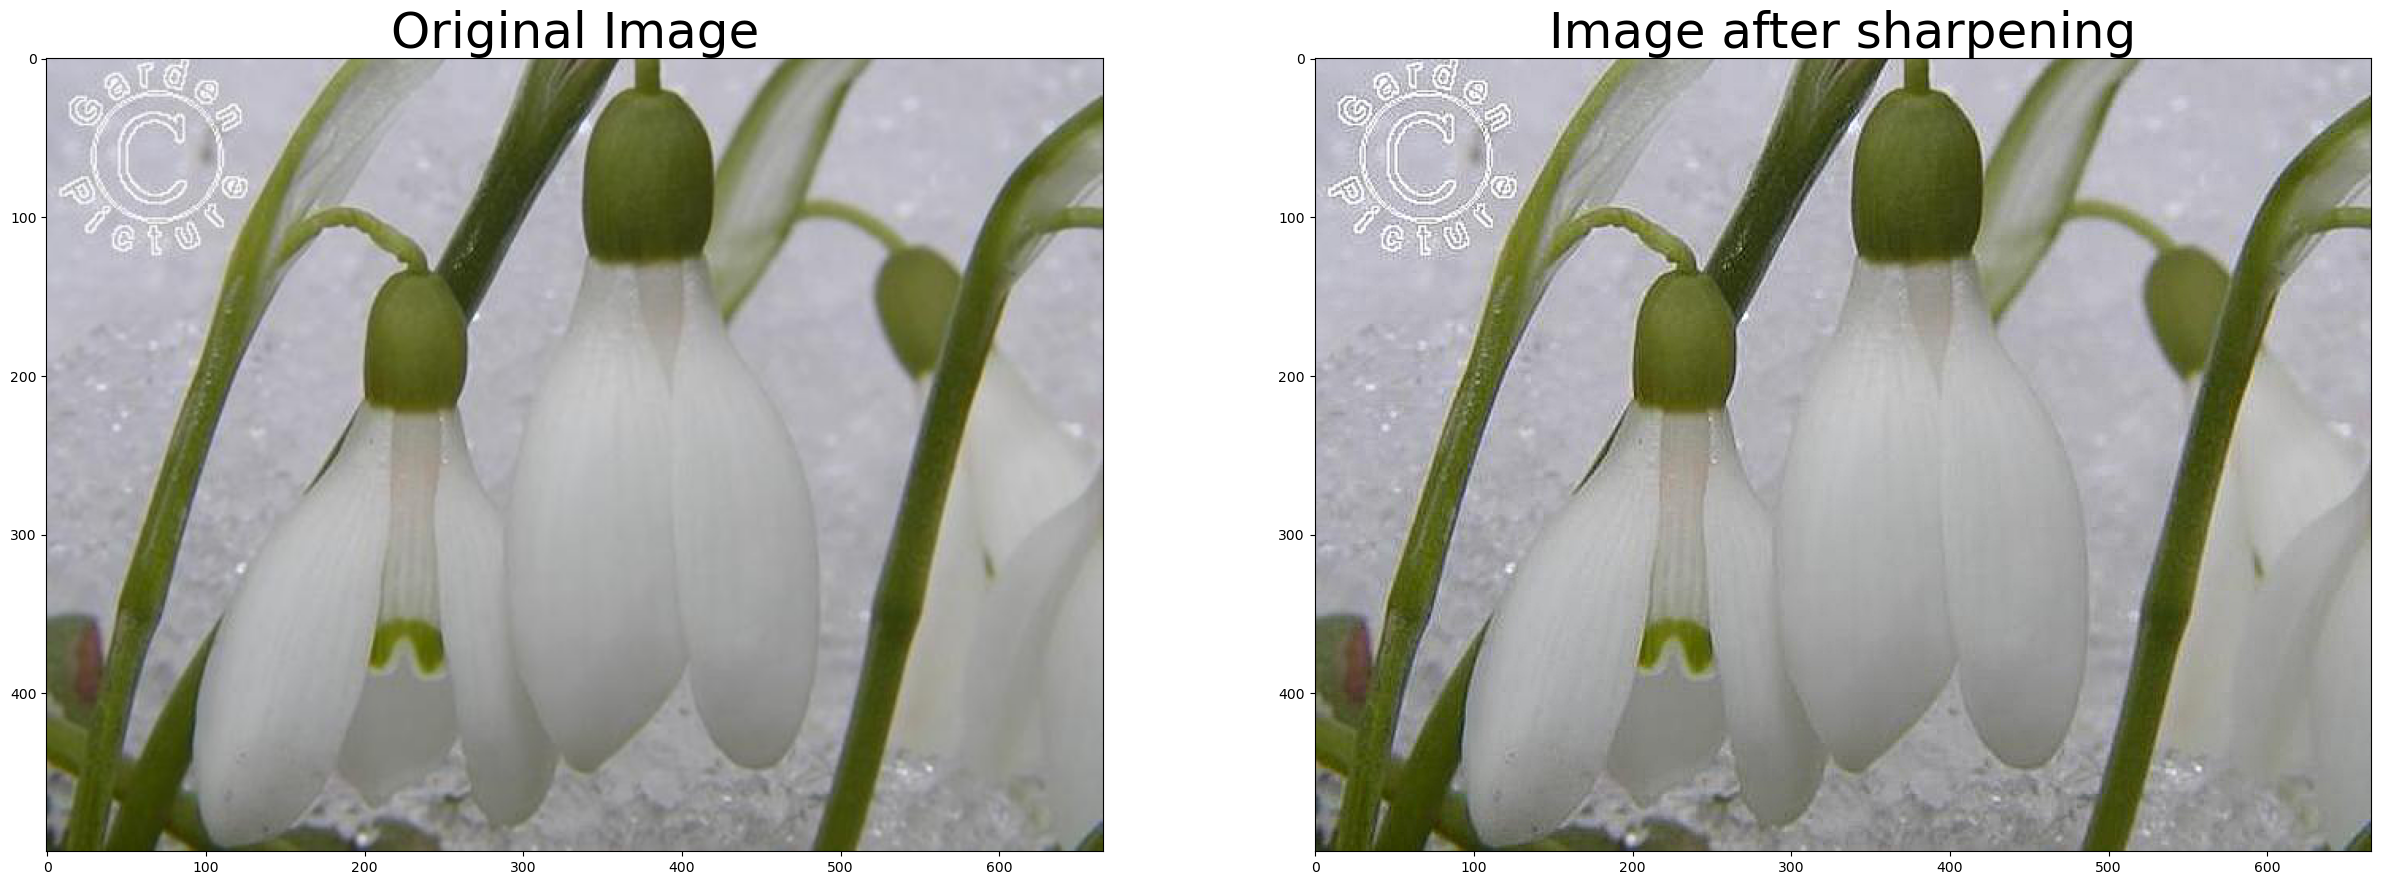

In [45]:
from PIL.ImageFilter import ( SHARPEN )
sharpen_image = image_original.filter(SHARPEN)

plt.figure(figsize =(30, 30))
plt.subplot(1, 2, 1)
plt.title('Original Image', fontsize = 36)
plt.imshow(image_original)
plt.subplot(1, 2, 2)
plt.title('Image after sharpening', fontsize = 36)
plt.imshow(sharpen_image)
plt.show()

## Part B - Q2 E - Apply a filter to blur the image and display the image before and after blur.

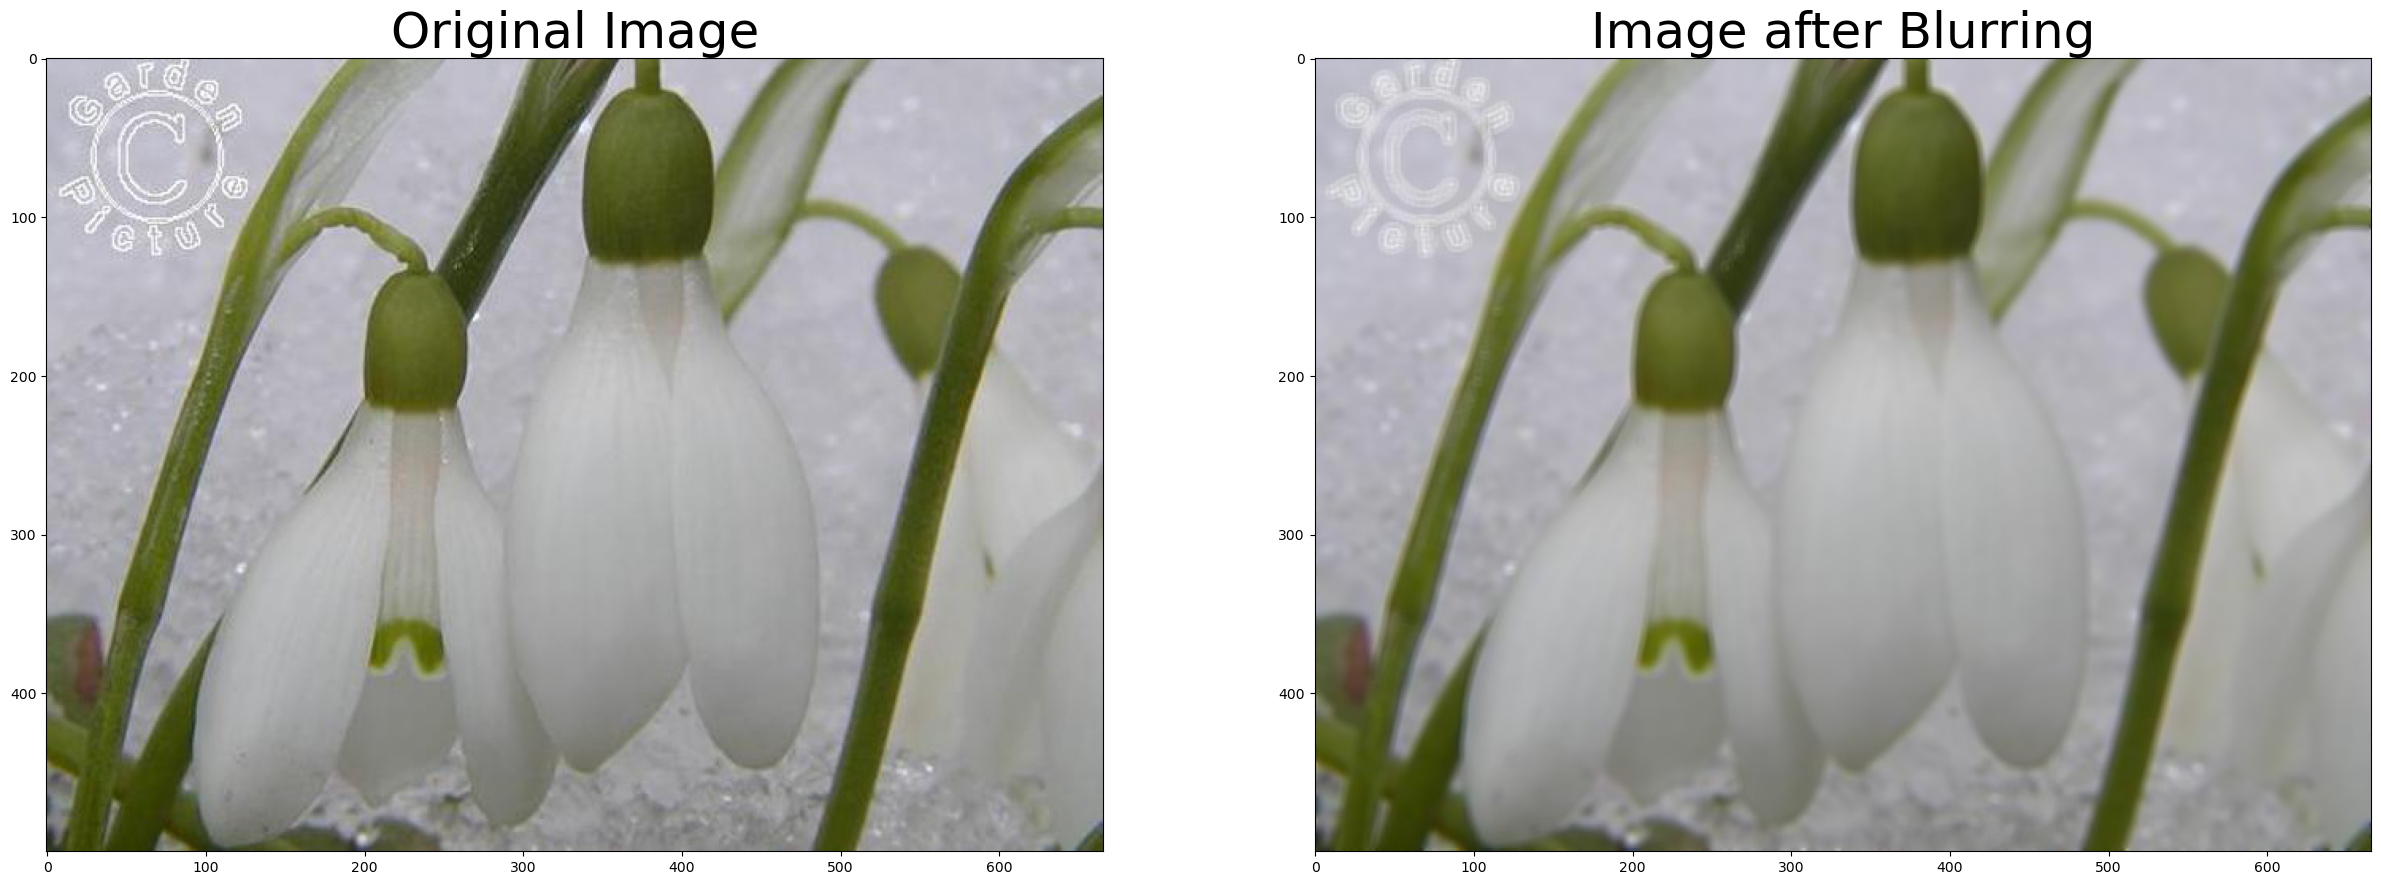

In [46]:
from PIL.ImageFilter import ( BLUR )
blur_image = image_original.filter(BLUR)

plt.figure(figsize =(30, 30))
plt.subplot(1, 2, 1)
plt.title('Original Image', fontsize = 36)
plt.imshow(image_original)
plt.subplot(1, 2, 2)
plt.title('Image after Blurring', fontsize = 36)
plt.imshow(blur_image)
plt.show()

## Part B - Q2 F - Display all the 4 images from above questions besides each other to observe the difference.

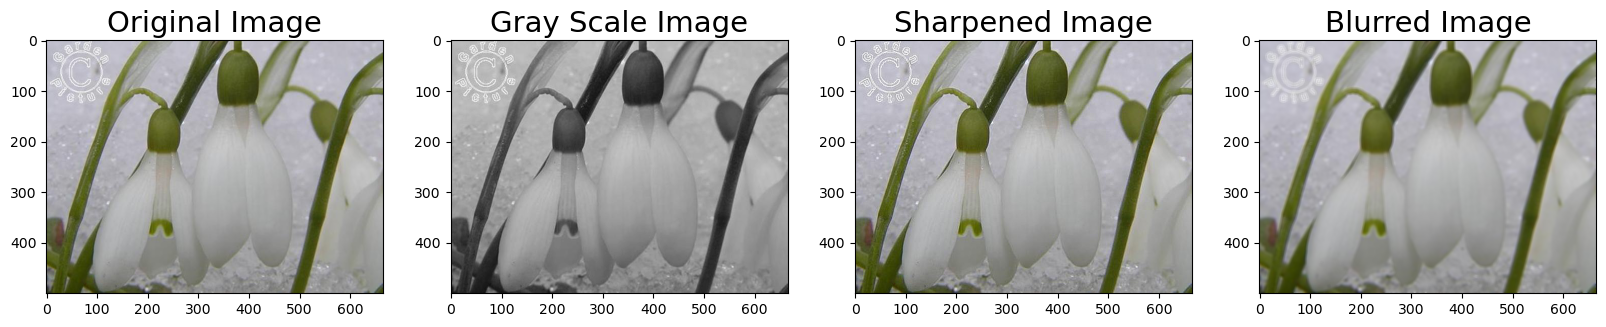

In [47]:

#Original Image
plt.figure(figsize =(20, 20))
plt.subplot(1, 4, 1)
plt.title('Original Image', fontsize = 21)
plt.imshow(image_original)

#Gray Scale Image
plt.subplot(1, 4, 2)
plt.title('Gray Scale Image', fontsize = 21)
plt.imshow(gray_image,cmap='gray')

#Sharpened Image
plt.subplot(1, 4, 3)
plt.title('Sharpened Image', fontsize = 21)
plt.imshow(sharpen_image)

#Blurred Image
plt.subplot(1, 4, 4)
plt.title('Blurred Image', fontsize = 21)
plt.imshow(blur_image)
plt.show()

In [48]:
## The filters are working correctly

## Part B - Q3 A - Split the data into train and test with 80:20 proportion.

In [49]:
from sklearn.model_selection import train_test_split
TRAIN_X,TEST_X,train_y, test_y= train_test_split( X , y ,test_size=0.2,random_state=11,stratify=y)

## Part B - Q3 B - Train a model using any Supervised Learning algorithm and share performance metrics on test data.

In [50]:
#Flatten the Image

# Train data
x_train_SL = []
for i in range(len(TRAIN_X)):
      x_train_SL.append(TRAIN_X[i,:].flatten())

# Test data
x_test_SL = []
for i in range(len(TEST_X)):
      x_test_SL.append(TEST_X[i,:].flatten())


# Shape of data

print("\n Training data",len(x_train_SL))
print("\n Training Target data",len(train_y))
print("\n Test data",len(x_test_SL))
print("\n Testing target data",len(test_y))


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_RF = RandomForestClassifier(n_estimators=100, 
                                  criterion='gini', 
                                  max_depth=None,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0, 
                                  max_features='auto',
                                  max_leaf_nodes=None, 
                                  bootstrap=True, 
                                  oob_score=False, 
                                  n_jobs=None, 
                                  random_state=None, 
                                  verbose=0, 
                                  warm_start=False,
                                  class_weight=None,
                                  ccp_alpha=0.0, 
                                  max_samples=None)
model_RF.fit(x_train_SL, train_y)

#Accuracy
pred_RF = model_RF.predict(x_test_SL)
RF_Train = model_RF.score(x_train_SL,train_y)
RF_Test = accuracy_score(test_y,pred_RF)     


print("\nRandom Forest: Train Accuracy",RF_Train)
print("\nRandom Forest: Test Accuracy",RF_Test)



 Training data 1088

 Training Target data 1088

 Test data 272

 Testing target data 272

Random Forest: Train Accuracy 1.0

Random Forest: Test Accuracy 0.4963235294117647


### Note: Random Forest test accuracy ~49.6%

## Part B - Q3 C - Train a model using Neural Network and share performance metrics on test data. 

In [110]:
# Neural Network Classifier

NN_train_X=TRAIN_X.reshape(TRAIN_X.shape[0],150528) # 224, 224, 3 
NN_test_X=TEST_X.reshape(TEST_X.shape[0],150528)


#Normalising
NN_train_X = NN_train_X/255.0
NN_test_X = NN_test_X/255.0


print('Training Set',NN_train_X.shape,train_y.shape)
print('Test Set',NN_test_X.shape,test_y.shape)

#Convert to categorial data for classification and one hot encore the same 
from keras.utils import np_utils
NN_y_train = np_utils.to_categorical(train_y)
NN_y_test = np_utils.to_categorical(test_y)

print('Training Set',NN_train_X.shape,NN_y_train.shape)
print('Test Set',NN_test_X.shape,NN_y_test.shape)

model_nn = Sequential()  
model_nn.add(BatchNormalization(input_shape = (150528,)))  ### Batch_Norm Layer

model_nn.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(17, activation='softmax'))

# Compile model
# sgd = optimizers.Adam(lr=1e-3)
model_nn.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy']) ### Loss function = Categorical cross entropy

Training Set (1088, 150528) (1088,)
Test Set (272, 150528) (272,)
Training Set (1088, 150528) (1088, 17)
Test Set (272, 150528) (272, 17)


In [111]:
model_nn.fit(NN_train_X,NN_y_train, validation_data=(NN_test_X,NN_y_test),epochs=50,batch_size=32)

Train on 1088 samples, validate on 272 samples


2023-01-15 23:19:14.039040: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_65/bias/Assign' id:9448 op device:{requested: '', assigned: ''} def:{{{node dense_65/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_65/bias, dense_65/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch 1/50
1088/1088 [==============================] - ETA: 0s - loss: 2.8296 - acc: 0.1075

/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-01-15 23:19:20.516873: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_18/mul' id:9593 op device:{requested: '', assigned: ''} def:{{{node loss_18/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_18/mul/x, loss_18/dense_68_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


1088/1088 [==============================] - 7s 6ms/sample - loss: 2.8296 - acc: 0.1075 - val_loss: 2.8329 - val_acc: 0.0478
Epoch 2/50
1088/1088 [==============================] - 6s 6ms/sample - loss: 2.8165 - acc: 0.1792 - val_loss: 2.8310 - val_acc: 0.0478
Epoch 3/50
1088/1088 [==============================] - 6s 6ms/sample - loss: 2.7973 - acc: 0.1903 - val_loss: 2.8276 - val_acc: 0.0478
Epoch 4/50
1088/1088 [==============================] - 7s 6ms/sample - loss: 2.7726 - acc: 0.1930 - val_loss: 2.8229 - val_acc: 0.0441
Epoch 5/50
1088/1088 [==============================] - 7s 6ms/sample - loss: 2.7450 - acc: 0.1976 - val_loss: 2.8167 - val_acc: 0.0478
Epoch 6/50
1088/1088 [==============================] - 8s 7ms/sample - loss: 2.7116 - acc: 0.1921 - val_loss: 2.8081 - val_acc: 0.0735
Epoch 7/50
1088/1088 [==============================] - 6s 6ms/sample - loss: 2.6783 - acc: 0.2031 - val_loss: 2.7965 - val_acc: 0.0809
Epoch 8/50
1088/1088 [==============================] - 7s 

In [112]:
# Test accuracy 
from sklearn.metrics import classification_report
pred_nn = model_nn.predict(NN_test_X)
nn_test_pred_labels = np.argmax(pred_nn,axis=1)
print(classification_report(nn_test_pred_labels,np.argmax(NN_y_test,axis=1)))

/Users/macuser/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-01-15 23:24:52.871339: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_68/Softmax' id:9517 op device:{requested: '', assigned: ''} def:{{{node dense_68/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_68/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


              precision    recall  f1-score   support

           0       0.42      0.38      0.40        13
           1       0.60      0.44      0.51        27
           2       0.47      0.67      0.55        12
           3       0.40      0.33      0.36        18
           4       0.47      0.64      0.54        11
           5       0.44      0.47      0.45        15
           6       0.44      0.31      0.36        13
           7       0.58      0.54      0.56        13
           8       0.59      0.71      0.65        14
           9       0.41      0.44      0.42        16
          10       0.61      0.52      0.56        21
          11       0.50      0.47      0.49        19
          12       0.92      0.55      0.69        22
          13       0.79      0.75      0.77        20
          14       0.30      0.54      0.39        13
          15       0.69      0.82      0.75        11
          16       0.72      0.93      0.81        14

    accuracy              

## Part B - Q3 D - Train a model using a basic CNN and share performance metrics on test data.

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers, losses
import numpy as np
np.random.seed(101)
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


#t_X,test_X,t_Y,test_Y = train_test_split(X,Y_one_hot,test_size=0.2,random_state=5, stratify=y)

t_X,test_X,t_Y,test_Y= train_test_split( X , y ,test_size=0.2,random_state=11,stratify=y)

t_Y = np_utils.to_categorical(t_Y)
test_Y = np_utils.to_categorical(test_y)

train_X = t_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.0
test_X = test_X/255.0


CNN_model = Sequential()
# Initialize the Sequential model model

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
CNN_model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))

# Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'relu' 
CNN_model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
CNN_model.add(Dropout(rate=0.2))

# Flatten the layer
CNN_model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
CNN_model.add(Dense(128, activation="relu"))
CNN_model.add(Dense(units = 64, activation = 'relu'))
CNN_model.add(Dense(units = 32, activation = 'relu'))
#Add Fully Connected Layer with 17 units and activation function as 'softmax'
CNN_model.add(Dense(17, activation="softmax"))


optimizer = Adam(learning_rate=0.001)
CNN_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
CNN_model.summary()
CNN_model.fit(train_X, t_Y, epochs = 10, validation_data = (test_X, test_Y),batch_size=256)

In [ ]:
print(CNN_model.evaluate(test_X,test_Y))
pred_cnn = CNN_model.predict(test_X)
cnn_test_pred_labels = np.argmax(pred_cnn,axis=1)
print(classification_report(cnn_test_pred_labels,np.argmax(test_Y,axis=1)))

## Part B - Q3 E - Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.

In [ ]:
predict_image = cv2.imread('Prediction.jpg')
predict_image = np.expand_dims(preprocess_input(predict_image/255),0)

In [ ]:
pred = CNN_model.predict(predict_image/255)
label = np.argmax(pred)
print('The predicted image class is {}.'.format(label))